# **Browser Agents**

An AI browser agent is a software program enhanced with artificial intelligence that can perform web-based tasks autonomously, much like a human user would. These agents operate within a web browser, using LLMs, and computer vision to interact with websites in a way that mimics human behavior.

Instead of following a rigid, pre-written script like traditional automation tools, an AI browser agent is given a high-level goal in natural language, such as "Find the top tech articles today" or "Book the cheapest flight to New York". The agent then independently plans and executes the steps needed to achieve that goal.



## Run your first browser agent

```python
from browser_use import Agent, ChatGoogle
from dotenv import load_dotenv
import asyncio

load_dotenv()

async def main():
    llm = ChatGoogle(model="gemini-2.5-flash")
    task = "Find the number 1 post on Show HN"
    agent = Agent(task=task, llm=llm)
    history = await agent.run()

if __name__ == "__main__":
    asyncio.run(main())
```

# Output Format

## Agent History

The `run()` method returns an `AgentHistoryList` object with the complete execution history:

```python
history = await agent.run()

# Access useful information
history.urls()                    # List of visited URLs
history.screenshot_paths()        # List of screenshot paths  
history.screenshots()             # List of screenshots as base64 strings
history.action_names()            # Names of executed actions
history.extracted_content()       # List of extracted content from all actions
history.errors()                  # List of errors (with None for steps without errors)
history.model_actions()           # All actions with their parameters
history.model_outputs()           # All model outputs from history
history.last_action()             # Last action in history

# Analysis methods
history.final_result()            # Get the final extracted content (last step)
history.is_done()                 # Check if agent completed successfully
history.is_successful()           # Check if agent completed successfully (returns None if not done)
history.has_errors()              # Check if any errors occurred
history.model_thoughts()          # Get the agent's reasoning process (AgentBrain objects)
history.action_results()          # Get all ActionResult objects from history
history.action_history()          # Get truncated action history with essential fields
history.number_of_steps()         # Get the number of steps in the history
history.total_duration_seconds()  # Get total duration of all steps in seconds

# Structured output (when using output_model_schema)
history.structured_output         # Property that returns parsed structured output
```

## Basic Search

```python
import asyncio
import os
import sys

from dotenv import load_dotenv

load_dotenv()

from browser_use import Agent, ChatGoogleGenerativeAI


async def main():
	# Instantiate the Google Gemini model
	llm = ChatGoogleGenerativeAI(model="gemini-pro")
	task = "Search Google for 'what is browser automation' and tell me the top 3 results"
	agent = Agent(task=task, llm=llm)
	await agent.run()

history.urls()                    # List of visited URLs
if __name__ == "__main__":
	asyncio.run(main())
```

# Run Basic Search example in your local machine, and provide history.urls()

In [ ]:
import asyncio
import os
from dotenv import load_dotenv
from browser_use import Agent, ChatGoogle

# Load environment variables
load_dotenv()

async def main():
    llm = ChatGoogle(
        api_key=os.getenv("GOOGLE_API_KEY"),
        model="gemini-2.5-flash"
    )

    task = "Search Google for 'what is browser automation' and tell me the top 3 results"
    agent = Agent(task=task, llm=llm)
    history = await agent.run()

    # Extract final LLM output (history)
    history_output = history.text() if hasattr(history, "text") else str(history)

    # Extract visited URLs
    visited_urls = history.urls() if hasattr(history, "urls") else []

    # Prepare strings
    visited_str = "\n".join(visited_urls)

    # Print to console
    print("History Output:")
    print(history_output)
    print("\nVisited URLs:")
    print(visited_str)

    # Save to text file
    with open("history_output.txt", "w", encoding="utf-8") as f:
        f.write("History Output:\n")
        f.write(history_output)
        f.write("\n\nVisited URLs:\n")
        f.write(visited_str)

if __name__ == "__main__":
    asyncio.run(main())


##Output Terminal

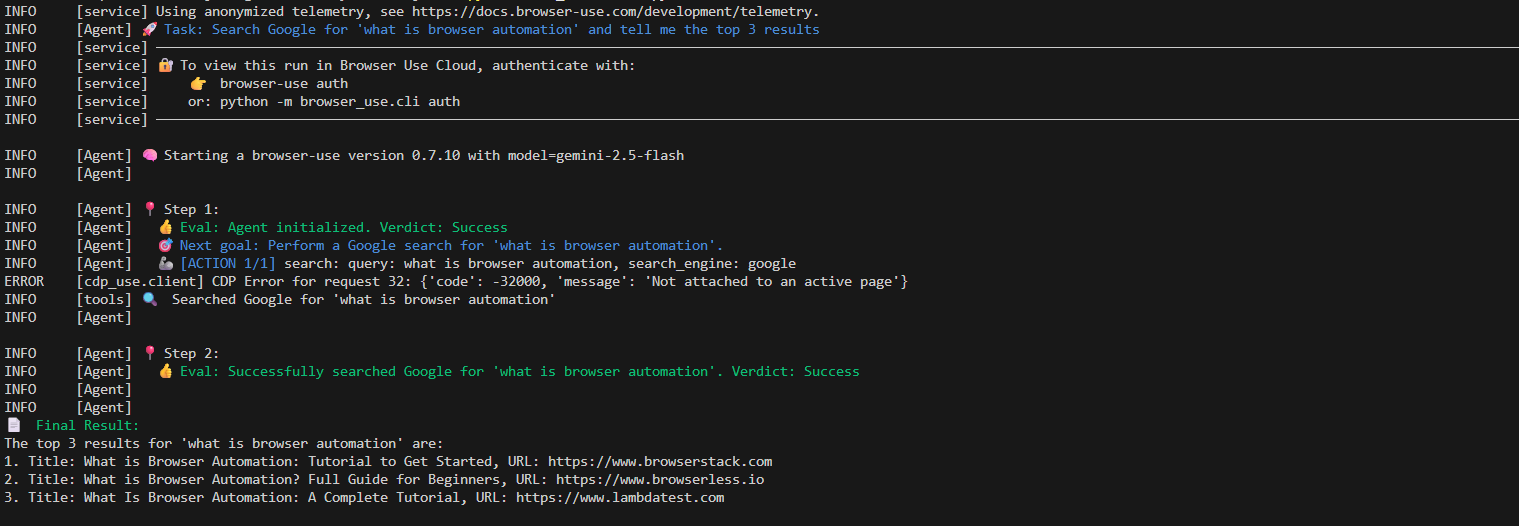

##History_output.txt which contains
1)Visited Website
2)Visited Urls

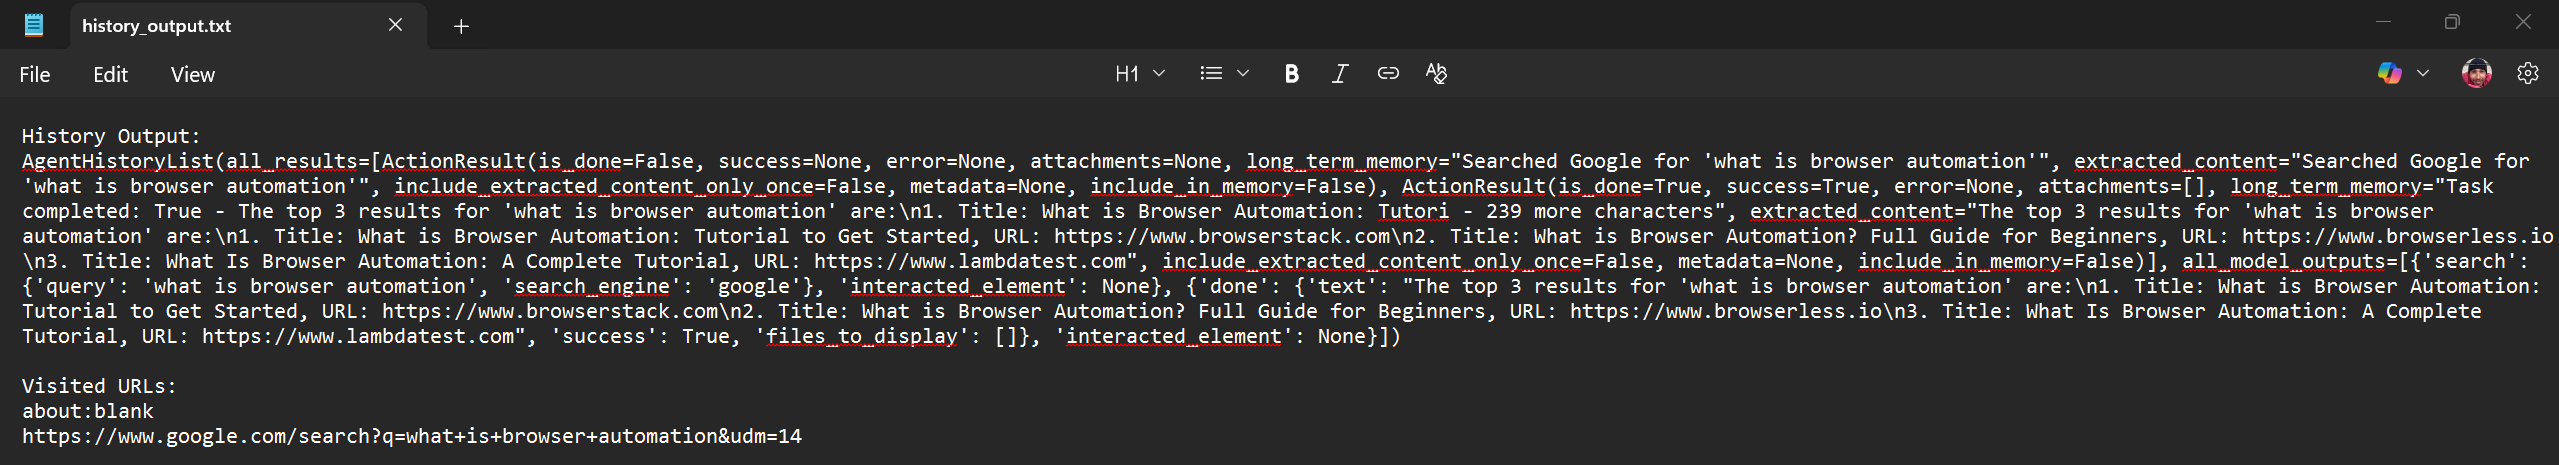